In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/omkar/OneDrive/Desktop/Self/Personal Project/young-people-survey/responses.csv")
df = pd.DataFrame(data)

In [3]:
pd.set_option('display.max_columns',150)
df.head(10)

,Music,Slow songs Fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,Countryside Outdoors,Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science Technology,Theatre,Fun Friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self Criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating School,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence Gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness Life,Energy levels,Small Big dogs,Personality,Finding lost valuables,Getting up,Interests Hobbies,Parents advice,Questionnaire Polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left Right handed,Education,Only child,Village Town,House Block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,

In [4]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.head()

,Music,Slow songs Fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,Countryside Outdoors,Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science Technology,Theatre,Fun Friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self Criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating School,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence Gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness Life,Energy levels,Small Big dogs,Personality,Finding lost valuables,Getting up,Interests Hobbies,Parents advice,Questionnaire Polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left Right handed,Education,Only child,Village Town,House Block of flats


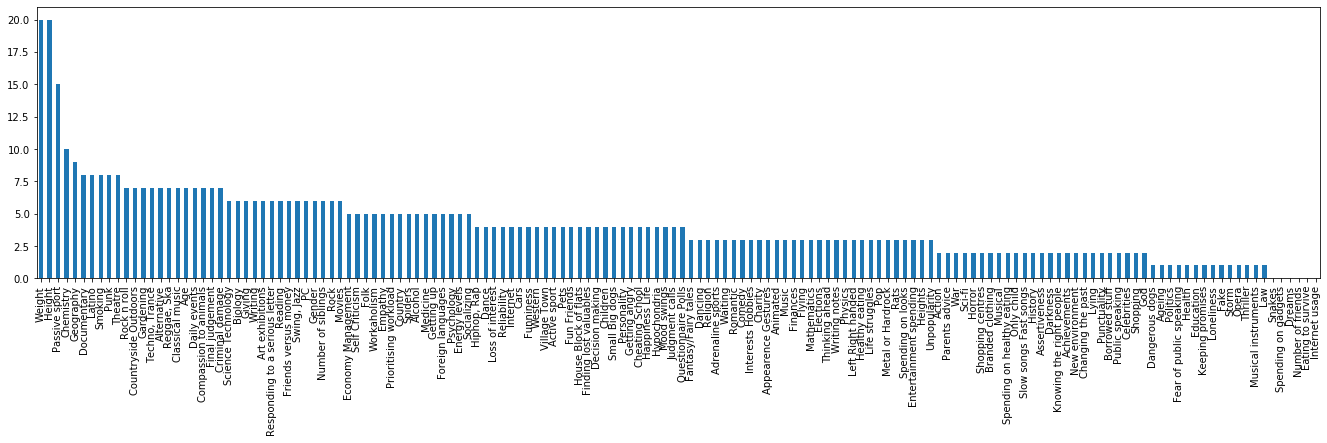

In [5]:
null_values = df.isnull().sum().sort_values(ascending=False)
null_values.plot(kind='bar', figsize=(23,5))

In [6]:
df = df.drop(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,63,64,65,66,67,68,69,71]], axis = 1, inplace = False)

In [7]:
df.head()

,Music,Slow songs Fast songs,Movies,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,Countryside Outdoors,Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science Technology,Theatre,Fun Friends,Adrenaline sports,Pets,Ageing,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self Criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating School,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence Gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness Life,Energy levels,Small Big dogs,Personality,Finding lost valuables,Getting up,Interests Hobbies,Parents advice,Questionnaire Polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left Right handed,Education,Only child,Village Town,House Block of flats
0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,5.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,3.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,5.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,5.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,4.0,5.0,former smoker,drink a lot,3.0,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.0,1,i am often early,only to avoid hurting someone,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,5.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,2.0,3.0,tried smoking,social drinker,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0

In [8]:
#labelling data
df = df.rename(columns={"Music": "Enjoy_music", "Slow songs Fast songs": "Music_pace", "Movies": "Enjoy_movies", "History": "Int_history", "Psychology": "Int_psychology", "Politics": "Int_politics", "Mathematics": "Int_math", "Physics": "Int_physics", "Internet": "Int_internet", "PC": "Int_pc_sw_hw", "Economy Management": "Int_econ_mg", "Biology": "Int_biology", "Chemistry": "Int_chem", "Reading": "Int_read", "Geography": "Int_geog", "Foreign languages": "Int_foreign_lang", "Medicine": "Int_meds", "Law": "Int_law", "Cars": "Int_car", "Art exhibitions": "Int_art_exibit", "Religion": "Int_religion", "Countryside Outdoors": "Int_outdoor_act", "Dancing": "Int_dance", "Musical instruments": "Int_music_inst", "Writing": "Int_poem_write", "Passive sport": "Int_passive_sp", "Active sport": "Int_active_sp", "Gardening": "Int_garden", "Celebrities": "Int_celeb_life", "Shopping": "Int_shop", "Science Technology": "Int_sci_tech", "Theatre": "Int_theatre", "Fun Friends": "Int_social", "Adrenaline sports": "Int_xsport", "Pets": "Int_pet", "Ageing": "Pho_age", "Fear of public speaking": "Pho_stage", "Smoking": "Health_smoke", "Alcohol": "Health_alc", "Healthy eating": "Health_life", "Daily events": "PT_Observant", "Prioritising workload": "PT_Priority_mg", "Writing notes": "PT_make_list", "Workaholism": "PT_workaholic", "Thinking ahead": "PT_think_ahead", "Final judgement": "PT_karma", "Reliability": "PT_reliable", "Keeping promises": "PT_keep_promise", "Loss of interest": "PT_butterfly", "Friends versus money": "PT_friend_money", "Funniness": "PT_funny", "Fake": "PT_two_face", "Criminal damage": "PT_violent", "Decision making": "PT_decisions", "Elections": "PT_voter", "Self Criticism": "PT_self_critic", "Judgment calls": "PT_attentive_speak", "Hypochondria": "PT_hypochon", "Empathy": "PT_empathetic", "Eating to survive": "PT_eat_survive", "Giving": "PT_xmas_giver", "Compassion to animals": "PT_animal_compassion", "Borrowed stuff": "PT_borrow_tc", "Loneliness": "PT_lonely", "Cheating School": "PT_school_cheat", "Health": "PT_health_consc", "Changing the past": "PT_regretter", "God": "PT_god", "Dreams": "PT_good_dream", "Charity": "PT_philanthropist", "Number of friends": "PT_friendly", "Punctuality": "PT_punctual", "Lying": "PT_liar", "Waiting": "PT_patient", "New environment": "PT_adapt_env", "Mood swings": "PT_moody", "Appearence Gestures": "PT_presentable", "Socializing": "PT_socializer", "Achievements": "PT_boaster", "Responding to a serious letter": "PT_think_imp_letter", "Children": "PT_child_lover", "Assertiveness": "PT_assertive", "Getting angry": "PT_short_temper", "Knowing the right people": "PT_know_right_people", "Public speaking": "PT_prep_public_speak", "Unpopularity": "PT_self_underminer", "Life struggles": "PT_emotional", "Happiness Life": "PT_happy_life", "Energy levels": "PT_energetic", "Small Big dogs": "PT_big_dogs", "Personality": "PT_pos_traits", "Finding lost valuables": "PT_lost_found", "Getting up": "PT_late_riser", "Interests Hobbies": "PT_hobbies_int", "Parents advice": "PT_parent_advice", "Questionnaire Polls": "PT_enjoy_survey", "Internet usage": "PT_internet_use", "Finances": "SH_penny_pinch", "Shopping centres": "SH_large_shop", "Branded clothing": "SH_brand", "Entertainment spending": "SH_party_social", "Spending on looks": "SH_appearance", "Spending on gadgets": "SH_gadgets", "Spending on healthy eating": "SH_healthy_food", "Age": "DM_age", "Height": "DM_height", "Weight": "DM_weight", "Number of siblings": "DM_num_siblings", "Gender": "DM_gender", "Left Right handed": "DM_l_r_handed", "Education": "DM_edu", "Only child": "DM_only_child", "Village Town": "DM_village_town", "House Block of flats": "DM_house_flat" })

In [46]:
#df.to_csv(r'C:/Users/omkar/OneDrive/Desktop/Self/Personal Project/young-people-survey\Changed.csv')

In [9]:
df.head(2)

,Enjoy_music,Music_pace,Enjoy_movies,Int_history,Int_psychology,Int_politics,Int_math,Int_physics,Int_internet,Int_pc_sw_hw,Int_econ_mg,Int_biology,Int_chem,Int_read,Int_geog,Int_foreign_lang,Int_meds,Int_law,Int_car,Int_art_exibit,Int_religion,Int_outdoor_act,Int_dance,Int_music_inst,Int_poem_write,Int_passive_sp,Int_active_sp,Int_garden,Int_celeb_life,Int_shop,Int_sci_tech,Int_theatre,Int_social,Int_xsport,Int_pet,Pho_age,Pho_stage,Health_smoke,Health_alc,Health_life,PT_Observant,PT_Priority_mg,PT_make_list,PT_workaholic,PT_think_ahead,PT_karma,PT_reliable,PT_keep_promise,PT_butterfly,PT_friend_money,PT_funny,PT_two_face,PT_violent,PT_decisions,PT_voter,PT_self_critic,PT_attentive_speak,PT_hypochon,PT_empathetic,PT_eat_survive,PT_xmas_giver,PT_animal_compassion,PT_borrow_tc,PT_lonely,PT_school_cheat,PT_health_consc,PT_regretter,PT_god,PT_good_dream,PT_philanthropist,PT_friendly,PT_punctual,PT_liar,PT_patient,PT_adapt_env,PT_moody,PT_presentable,PT_socializer,PT_boaster,PT_think_imp_letter,PT_child_lover,PT_assertive,PT_short_temper,PT_know_right_people,PT_prep_public_speak,PT_self_underminer,PT_emotional,PT_happy_life,PT_energetic,PT_big_dogs,PT_pos_traits,PT_lost_found,PT_late_riser,PT_hobbies_int,PT_parent_advice,PT_enjoy_survey,PT_internet_use,SH_penny_pinch,SH_large_shop,SH_brand,SH_party_social,SH_appearance,SH_gadgets,SH_healthy_food,DM_age,DM_height,DM_weight,DM_num_siblings,DM_gender,DM_l_r_handed,DM_edu,DM_only_child,DM_village_town,DM_house_flat
0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,5.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,3.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [10]:
dn = df.dropna()
dn.isnull().sum()

Enjoy_music        0
Music_pace         0
Enjoy_movies       0
Int_history        0
Int_psychology     0
                  ..
DM_l_r_handed      0
DM_edu             0
DM_only_child      0
DM_village_town    0
DM_house_flat      0
Length: 114, dtype: int64

In [11]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Columns: 114 entries, Enjoy_music to DM_house_flat
dtypes: float64(99), int64(4), object(11)
memory usage: 655.0+ KB


In [12]:
#filtering personality traits
filter_PT = [col for col in dn if col.startswith('PT')]
personality = dn[filter_PT]

#filtering interests
filter_int = [col for col in dn if col.startswith('Int')]
interest = dn[filter_int]

#filtering health habits
filter_HH = [col for col in dn if col.startswith('Health')]
HH = dn[filter_HH]

#filtering spending habits
filter_spend = [col for col in dn if col.startswith('SH')]
spend = dn[filter_spend]


In [131]:
#filtering relevant hobbies for self-awareness
relevant_int = dn[['Int_psychology', 'Int_read', 'Int_religion', 'Int_outdoor_act', 'Int_dance', 'Int_music_inst', 'Int_poem_write', 'Int_passive_sp', 'Int_active_sp', 'Int_theatre', 'Int_social', 'Int_xsport']]
target_int = dn[['Int_psychology']]
target_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Int_psychology  729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [14]:
#filtering relevant demographics
relevant_DM = dn[['DM_gender', 'DM_edu', 'DM_village_town']]
relevant_DM = relevant_DM.astype('category')
relevant_DM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DM_gender        729 non-null    category
 1   DM_edu           729 non-null    category
 2   DM_village_town  729 non-null    category
dtypes: category(3)
memory usage: 8.2 KB


In [15]:
PT_new = personality.iloc[:,[0,2,4,8,12,13,15,16,18,26,31,33,34,35,39,43]]
PT_new.head()

,PT_Observant,PT_make_list,PT_think_ahead,PT_butterfly,PT_violent,PT_decisions,PT_self_critic,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_moody,PT_think_imp_letter,PT_know_right_people
0,2.0,5.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,i am always on time,3.0,4.0,3.0,3.0,3.0
1,3.0,4.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,4.0,i am often early,3.0,4.0,4.0,4.0,4.0
2,1.0,5.0,5.0,1.0,1.0,3.0,4.0,4.0,5.0,5.0,i am often running late,2.0,3.0,4.0,4.0,3.0
4,3.0,2.0,5.0,2.0,1.0,3.0,5.0,5.0,3.0,4.0,i am always on time,3.0,4.0,2.0,3.0,3.0
5,2.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.0,i am often early,3.0,4.0,3.0,2.0,4.0


In [16]:
PT_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          729 non-null    float64
 1   PT_make_list          729 non-null    float64
 2   PT_think_ahead        729 non-null    float64
 3   PT_butterfly          729 non-null    float64
 4   PT_violent            729 non-null    float64
 5   PT_decisions          729 non-null    float64
 6   PT_self_critic        729 non-null    float64
 7   PT_attentive_speak    729 non-null    float64
 8   PT_empathetic         729 non-null    float64
 9   PT_regretter          729 non-null    float64
 10  PT_punctual           729 non-null    object 
 11  PT_patient            729 non-null    float64
 12  PT_adapt_env          729 non-null    float64
 13  PT_moody              729 non-null    float64
 14  PT_think_imp_letter   729 non-null    float64
 15  PT_know_right_people  

In [21]:
PT_new['PT_punctual'].unique()

array([3, 5, 1], dtype=int64)

In [18]:
PT_new['PT_punctual'] = PT_new['PT_punctual'].replace('i am often running late', 1)

C:\Users\omkar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
PT_new['PT_punctual'] = PT_new['PT_punctual'].replace('i am always on time', 3)

C:\Users\omkar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
PT_new['PT_punctual'] = PT_new['PT_punctual'].replace('i am often early', 5)

C:\Users\omkar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
filter_edit = ['PT_butterfly', 'PT_violent', 'PT_self_critic', 'PT_moody']
PT_edit = PT_new[filter_edit]

In [23]:
PT_edit.head()

,PT_butterfly,PT_violent,PT_self_critic,PT_moody
0,1.0,1.0,1.0,3.0
1,3.0,1.0,4.0,4.0
2,1.0,1.0,4.0,4.0
4,2.0,1.0,5.0,2.0
5,3.0,4.0,4.0,3.0


In [24]:
#reversing scale to change the valence of responses

PT_revise = PT_edit.replace([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])
PT_revise.head()

,PT_butterfly,PT_violent,PT_self_critic,PT_moody
0,5.0,5.0,5.0,3.0
1,3.0,5.0,2.0,2.0
2,5.0,5.0,2.0,2.0
4,4.0,5.0,1.0,4.0
5,3.0,2.0,2.0,3.0


In [25]:
PT_new = PT_new.drop(PT_new.columns[[3, 4, 6, 13]], axis = 1, inplace = False)
PT_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          729 non-null    float64
 1   PT_make_list          729 non-null    float64
 2   PT_think_ahead        729 non-null    float64
 3   PT_decisions          729 non-null    float64
 4   PT_attentive_speak    729 non-null    float64
 5   PT_empathetic         729 non-null    float64
 6   PT_regretter          729 non-null    float64
 7   PT_punctual           729 non-null    int64  
 8   PT_patient            729 non-null    float64
 9   PT_adapt_env          729 non-null    float64
 10  PT_think_imp_letter   729 non-null    float64
 11  PT_know_right_people  729 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 74.0 KB


In [26]:
PT_edited = pd.concat([PT_new, PT_revise], axis=1)
PT_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          729 non-null    float64
 1   PT_make_list          729 non-null    float64
 2   PT_think_ahead        729 non-null    float64
 3   PT_decisions          729 non-null    float64
 4   PT_attentive_speak    729 non-null    float64
 5   PT_empathetic         729 non-null    float64
 6   PT_regretter          729 non-null    float64
 7   PT_punctual           729 non-null    int64  
 8   PT_patient            729 non-null    float64
 9   PT_adapt_env          729 non-null    float64
 10  PT_think_imp_letter   729 non-null    float64
 11  PT_know_right_people  729 non-null    float64
 12  PT_butterfly          729 non-null    float64
 13  PT_violent            729 non-null    float64
 14  PT_self_critic        729 non-null    float64
 15  PT_moody              

In [27]:
#Self-awareness score
PT_edited['SA_Score']= float(0)
PT_edited['SA_Score']= PT_edited.sum(axis=1)

PT_edited.head()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score
0,2.0,5.0,2.0,3.0,3.0,3.0,1.0,3,3.0,4.0,3.0,3.0,5.0,5.0,5.0,3.0,53.0
1,3.0,4.0,4.0,2.0,4.0,2.0,4.0,5,3.0,4.0,4.0,4.0,3.0,5.0,2.0,2.0,55.0
2,1.0,5.0,5.0,3.0,4.0,5.0,5.0,1,2.0,3.0,4.0,3.0,5.0,5.0,2.0,2.0,55.0
4,3.0,2.0,5.0,3.0,5.0,3.0,4.0,3,3.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0,55.0
5,2.0,3.0,3.0,2.0,4.0,4.0,3.0,5,3.0,4.0,2.0,4.0,3.0,2.0,2.0,3.0,49.0


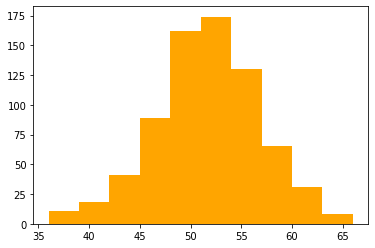

In [28]:
#Calculate Self-awareness Score
plt.hist(PT_edited['SA_Score'], bins = 10, color = 'orange')
plt.show()

In [29]:
#Distribution between score 36-66
#Considering top 25% of distribution to be self aware

PT_edited['SA_Score'].value_counts()

50.0    68
52.0    65
49.0    60
51.0    57
53.0    52
55.0    46
54.0    46
47.0    39
56.0    38
48.0    34
57.0    34
46.0    30
45.0    20
59.0    17
44.0    15
58.0    14
42.0    14
60.0    13
43.0    12
61.0    12
41.0    10
62.0     6
40.0     5
38.0     5
63.0     4
37.0     3
39.0     3
36.0     3
66.0     2
64.0     1
65.0     1
Name: SA_Score, dtype: int64

In [161]:
#Setting threshold for self-awareness at 58
PT_edited['SA'] = ''
PT_edited['SA'] = PT_edited['SA_Score'] > 58

PT_edited.head()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,SA
0,2.0,5.0,2.0,3.0,3.0,3.0,1.0,3,3.0,4.0,3.0,3.0,5.0,5.0,5.0,3.0,53.0,False
1,3.0,4.0,4.0,2.0,4.0,2.0,4.0,5,3.0,4.0,4.0,4.0,3.0,5.0,2.0,2.0,55.0,False
2,1.0,5.0,5.0,3.0,4.0,5.0,5.0,1,2.0,3.0,4.0,3.0,5.0,5.0,2.0,2.0,55.0,False
4,3.0,2.0,5.0,3.0,5.0,3.0,4.0,3,3.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0,55.0,False
5,2.0,3.0,3.0,2.0,4.0,4.0,3.0,5,3.0,4.0,2.0,4.0,3.0,2.0,2.0,3.0,49.0,False


In [162]:
PT_edited['SA'].value_counts()

False    673
True      56
Name: SA, dtype: int64

In [155]:
## EDA Self Awareness #############

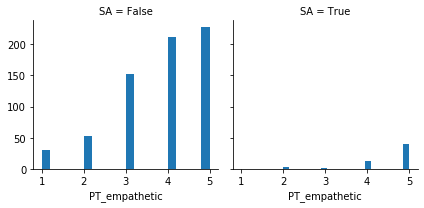

In [156]:
g = sns.FacetGrid(PT_edited, col='SA')
g.map(plt.hist, 'PT_empathetic', bins=20)

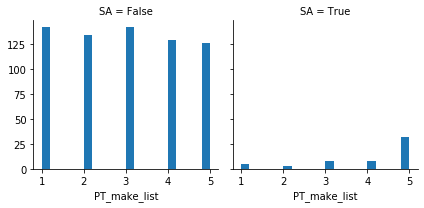

In [159]:
g = sns.FacetGrid(PT_edited, col='SA')
g.map(plt.hist, 'PT_make_list', bins=20)

In [32]:
Self_aware = PT_edited[PT_edited['SA'] == True]
Self_aware.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 10 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          56 non-null     float64
 1   PT_make_list          56 non-null     float64
 2   PT_think_ahead        56 non-null     float64
 3   PT_decisions          56 non-null     float64
 4   PT_attentive_speak    56 non-null     float64
 5   PT_empathetic         56 non-null     float64
 6   PT_regretter          56 non-null     float64
 7   PT_punctual           56 non-null     int64  
 8   PT_patient            56 non-null     float64
 9   PT_adapt_env          56 non-null     float64
 10  PT_think_imp_letter   56 non-null     float64
 11  PT_know_right_people  56 non-null     float64
 12  PT_butterfly          56 non-null     float64
 13  PT_violent            56 non-null     float64
 14  PT_self_critic        56 non-null     float64
 15  PT_moody              5

In [165]:
## SELF - AWARENESS PREDICTOR

#Concatenating Relevant Demographic data
PT_SA = PT_edited.drop(['SA_Score'], axis = 1, inplace = False)
PT_int_target = pd.concat([PT_edited, target_int], axis = 1)
PT_int_SA = pd.concat([PT_edited, relevant_int], axis = 1)
PT_DM_SA = pd.concat([PT_edited, relevant_DM], axis=1)
PT_SA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          729 non-null    float64
 1   PT_make_list          729 non-null    float64
 2   PT_think_ahead        729 non-null    float64
 3   PT_decisions          729 non-null    float64
 4   PT_attentive_speak    729 non-null    float64
 5   PT_empathetic         729 non-null    float64
 6   PT_regretter          729 non-null    float64
 7   PT_punctual           729 non-null    int64  
 8   PT_patient            729 non-null    float64
 9   PT_adapt_env          729 non-null    float64
 10  PT_think_imp_letter   729 non-null    float64
 11  PT_know_right_people  729 non-null    float64
 12  PT_butterfly          729 non-null    float64
 13  PT_violent            729 non-null    float64
 14  PT_self_critic        729 non-null    float64
 15  PT_moody              

In [35]:
PT_DM_SA.groupby('SA').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score
SA,,,,,,,,,,,,,,,,,
False,3.023774,2.945022,3.32838,3.158990,3.947994,3.821694,2.970282,3.038633,2.609212,3.445765,3.035661,3.426449,3.264487,3.347697,2.332838,2.704309,50.401189
True,3.767857,4.053571,4.25000,3.642857,4.589286,4.589286,2.732143,4.142857,3.232143,3.821429,3.339286,3.857143,4.017857,4.517857,2.714286,3.446429,60.714286


In [36]:
PT_int_SA.groupby('SA').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,Int_psychology,Int_read,Int_religion,Int_outdoor_act,Int_dance,Int_music_inst,Int_poem_write,Int_passive_sp,Int_active_sp,Int_theatre,Int_social,Int_xsport
SA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3.023774,2.945022,3.32838,3.158990,3.947994,3.821694,2.970282,3.038633,2.609212,3.445765,3.035661,3.426449,3.264487,3.347697,2.332838,2.704309,50.401189,3.089153,3.157504,2.208024,3.607727,2.374443,2.304606,1.864785,3.399703,3.260030,3.013373,4.548291,2.955423
True,3.767857,4.053571,4.25000,3.642857,4.589286,4.589286,2.732143,4.142857,3.232143,3.821429,3.339286,3.857143,4.017857,4.517857,2.714286,3.446429,60.714286,3.553571,3.571429,2.750000,4.267857,2.875000,2.446429,2.107143,3.500000,3.339286,3.446429,4.553571,2.696429


In [37]:
PT_DM_SA.groupby('DM_gender').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,SA
DM_gender,,,,,,,,,,,,,,,,,,
female,2.981481,3.317130,3.354167,3.310185,4.046296,4.094907,2.953704,3.064815,2.622685,3.442130,3.062500,3.428241,3.331019,3.666667,2.307870,2.553241,51.537037,0.083333
male,3.225589,2.612795,3.464646,3.030303,3.925926,3.569024,2.949495,3.208754,2.707071,3.521886,3.053872,3.505051,3.309764,3.104377,2.441077,3.063973,50.693603,0.067340


In [101]:
PT_DM_SA.groupby('DM_edu').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,SA
DM_edu,,,,,,,,,,,,,,,,,,
college/bachelor degree,3.224490,3.163265,3.537415,3.122449,3.959184,3.816327,2.850340,3.136054,2.591837,3.659864,2.952381,3.612245,3.149660,3.591837,2.346939,2.904762,51.619048,0.081633
currently a primary school pupil,3.000000,2.750000,3.000000,3.000000,3.750000,3.000000,4.500000,3.000000,2.500000,3.500000,3.000000,3.500000,2.750000,3.000000,3.500000,2.250000,50.000000,0.000000
doctorate degree,4.000000,3.666667,4.000000,2.000000,4.000000,2.666667,3.333333,3.666667,3.333333,3.333333,3.000000,3.333333,3.000000,3.000000,2.666667,3.333333,52.333333,0.000000
masters degree,3.345455,3.545455,3.509091,3.218182,3.890909,3.927273,2.600000,3.036364,2.781818,3.363636,2.854545,3.309091,3.436364,3.872727,2.381818,2.709091,51.781818,0.054545
primary school,2.793103,2.603448,3.258621,3.034483,3.913793,3.775862,3.413793,3.379310,2.706897,3.672414,3.137931,3.551724,3.224138,3.206897,2.413793,2.344828,50.431034,0.051724
secondary school,3.034632,2.978355,3.359307,3.246753,4.034632,3.924242,2.952381,3.095238,2.653680,3.404762,3.108225,3.417749,3.383117,3.372294,2.346320,2.774892,51.086580,0.082251


In [40]:
PT_DM_SA.groupby('DM_village_town').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,SA
DM_village_town,,,,,,,,,,,,,,,,,,
city,3.127135,3.001898,3.388994,3.165085,3.965844,3.833017,2.963947,3.018975,2.675522,3.455408,3.049336,3.491461,3.301708,3.45351,2.366224,2.764706,51.022770,0.062619
village,2.960396,3.103960,3.425743,3.277228,4.079208,4.004950,2.920792,3.396040,2.608911,3.524752,3.084158,3.376238,3.376238,3.39604,2.351485,2.752475,51.638614,0.113861


In [133]:
PT_int_target.groupby('SA').mean()

,PT_Observant,PT_make_list,PT_think_ahead,PT_decisions,PT_attentive_speak,PT_empathetic,PT_regretter,PT_punctual,PT_patient,PT_adapt_env,PT_think_imp_letter,PT_know_right_people,PT_butterfly,PT_violent,PT_self_critic,PT_moody,SA_Score,Int_psychology
SA,,,,,,,,,,,,,,,,,,
False,3.023774,2.945022,3.32838,3.158990,3.947994,3.821694,2.970282,3.038633,2.609212,3.445765,3.035661,3.426449,3.264487,3.347697,2.332838,2.704309,50.401189,3.089153
True,3.767857,4.053571,4.25000,3.642857,4.589286,4.589286,2.732143,4.142857,3.232143,3.821429,3.339286,3.857143,4.017857,4.517857,2.714286,3.446429,60.714286,3.553571


In [134]:
#PT_int_target['SA'] = PT_int_target['SA'].astype('category')
#PT_int_final = PT_int_target.drop(['SA'], axis = 1, inplace = False)

PT_int_target['SA'] = PT_int_target['SA'].replace(False, 1)
PT_int_target['SA'] = PT_int_target['SA'].replace(True, 5)

PT_int_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 1009
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PT_Observant          729 non-null    float64
 1   PT_make_list          729 non-null    float64
 2   PT_think_ahead        729 non-null    float64
 3   PT_decisions          729 non-null    float64
 4   PT_attentive_speak    729 non-null    float64
 5   PT_empathetic         729 non-null    float64
 6   PT_regretter          729 non-null    float64
 7   PT_punctual           729 non-null    int64  
 8   PT_patient            729 non-null    float64
 9   PT_adapt_env          729 non-null    float64
 10  PT_think_imp_letter   729 non-null    float64
 11  PT_know_right_people  729 non-null    float64
 12  PT_butterfly          729 non-null    float64
 13  PT_violent            729 non-null    float64
 14  PT_self_critic        729 non-null    float64
 15  PT_moody              

In [166]:
#Identifying target variable

#data_PT_int_target = PT_int_target.loc[:, PT_int_target.columns != 'Int_psychology']
#target_PT_int_target = PT_int_target.loc[:, PT_int_target.columns == 'Int_psychology']

data_PT_SA = PT_SA.loc[:, PT_SA.columns != 'SA']
target_PT_SA = PT_SA.loc[:, PT_SA.columns == 'SA']

data_PT_int_SA = PT_int_SA.loc[:, PT_int_SA.columns != 'SA']
target_PT_int_SA = PT_int_SA.loc[:, PT_int_SA.columns == 'SA']


In [168]:
data_PT_SA.shape

(729, 16)

In [167]:
target_PT_SA.shape

(729, 1)

In [169]:
######!!!!!! Scale and normalize data for PT_DM_SA
###### Current model data_PT_int_target

x_train, x_test, y_train, y_test = train_test_split(data_PT_int_target, target_PT_int_target, test_size=0.25, random_state=0)

In [151]:
#initiating instance of Logreg model
logReg = LogisticRegression()

#fitting Logreg model
logReg.fit(x_train, y_train)

C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
#predicting values for test dataset
predictions = logReg.predict(x_test)

In [153]:
# Use score method to get accuracy of model
score = logReg.score(x_test, y_test)
print(score)

0.20765027322404372


In [ ]:
#### Initiating KMeans classifier
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)